# Water Feasabilty with TensorFlow

In [1]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

## Data

In [3]:
df = pd.read_csv('/kaggle/input/gammafest-water-feasability/important_features.csv')
df

,DC024,DC205,DC214,DC220,DC235,DC109,DC142a,DC201
0,11.0,16.0,36.0,80.0,1.000000,12.0,60.0,1.0
1,11.0,31.0,36.0,44.0,1.000000,31.0,70.0,1.0
2,11.0,12.0,36.0,35.0,1.000000,11.0,75.0,1.0
3,11.0,12.0,36.0,79.0,1.000000,11.0,85.0,1.0
4,11.0,12.0,36.0,37.0,1.000000,11.0,65.0,1.0
...,...,...,...,...,...,...,...,...
35965,94.0,17.0,24.0,21.0,3.000000,21.0,9.0,1.0
35966,94.0,12.0,32.0,41.0,1.951290,11.0,12.0,1.0
35967,94.0,12.0,24.0,52.0,2.073468,11.0,48.0,1.0
35968,94.0,12.0,32.0,58.0,1.969629,11.0,39.0,1.0


In [4]:
target_column = 'DC201'

In [5]:
df[target_column] = df[target_column].astype(int)

In [6]:
y = np.array(df[target_column]) # value dari label
df = df.drop(target_column, axis=1) # drop target
feature_list = list(df.columns) # list column
X = np.array(df) # df dalam bentuk numpy array

### Undersampling

In [7]:
from imblearn.under_sampling import NearMiss
from collections import Counter

undersampling = NearMiss(version = 1, n_neighbors=3)
X_nm, y_nm = undersampling.fit_resample(X, y)

counter = Counter(y_nm)
print(counter)

Counter({0: 3572, 1: 3572})


### Oversampling

In [8]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# smote = SMOTE()
# X_sm, y_sm = smote.fit_resample(X, y)

# counter = Counter(y_sm)
# print(counter)

### Splitting

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.2)

print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(5715, 7) (5715,)
(1429, 7) (1429,)


In [10]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Modeling

In [11]:
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 100

In [12]:
tf.keras.backend.clear_session() # clean session
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=EPOCHS,
                    callbacks=[
                        EarlyStopping(patience=5, restore_best_weights=True),
                        ModelCheckpoint("model/titanic_neural.h5", save_best_only=True)
                    ],
                    batch_size=BATCH_SIZE
                    )

Epoch 1/100
179/179 [==============================] - 5s 5ms/step - loss: 0.5910 - accuracy: 0.6261 - val_loss: 0.5228 - val_accuracy: 0.7782
Epoch 2/100
179/179 [==============================] - 1s 4ms/step - loss: 0.5180 - accuracy: 0.7627 - val_loss: 0.4977 - val_accuracy: 0.7775
Epoch 3/100
179/179 [==============================] - 1s 5ms/step - loss: 0.4982 - accuracy: 0.7734 - val_loss: 0.4865 - val_accuracy: 0.7656
Epoch 4/100
179/179 [==============================] - 1s 5ms/step - loss: 0.4876 - accuracy: 0.7755 - val_loss: 0.4728 - val_accuracy: 0.7922
Epoch 5/100
179/179 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.7785 - val_loss: 0.4617 - val_accuracy: 0.7922
Epoch 6/100
179/179 [==============================] - 1s 4ms/step - loss: 0.4694 - accuracy: 0.7822 - val_loss: 0.4531 - val_accuracy: 0.7922
Epoch 7/100
179/179 [==============================] - 1s 4ms/step - loss: 0.4624 - accuracy: 0.7853 - val_loss: 0.4465 - val_accuracy: 0.7957

## Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8118
Test Loss is 0.40296778082847595
Test Accuracy is 0.8117564916610718


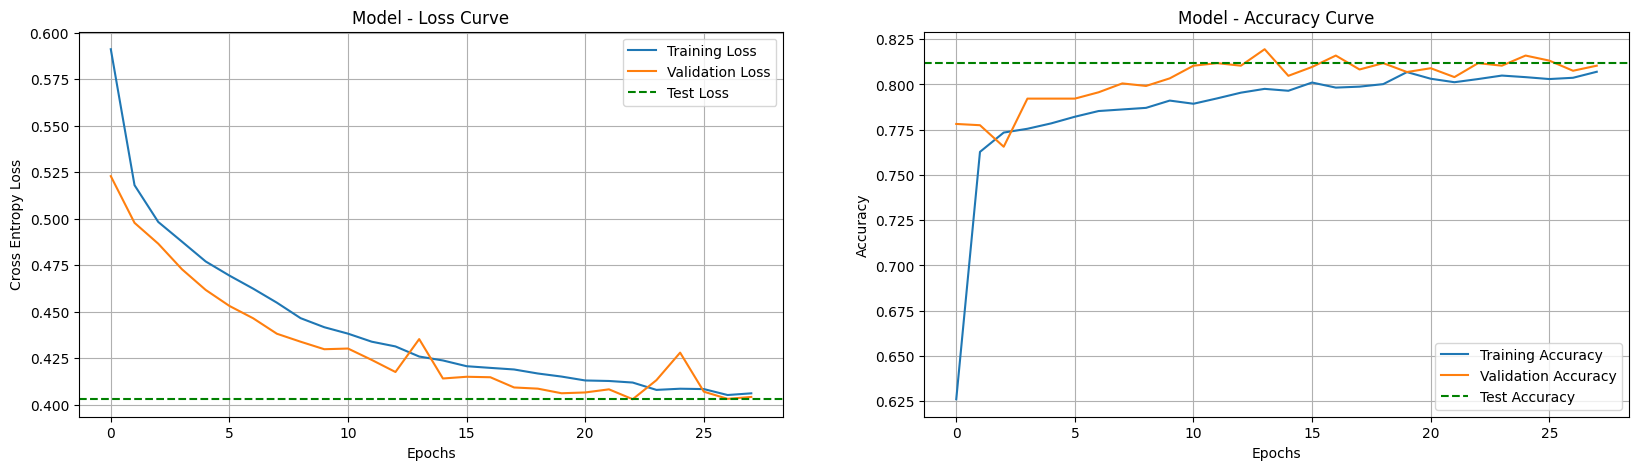

In [15]:
# Collect the history of the training run
history = pd.DataFrame(history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("Model - Loss Curve")
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
# plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("Model - Accuracy Curve")
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [16]:
predict=model.predict(X_test)

y_pred=[]
for i in range(len(predict)):
    y_pred.append(0 if predict[i] < 0.5 else 1)

45/45 [==============================] - 0s 1ms/step


In [17]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       722
           1       0.86      0.74      0.79       707

    accuracy                           0.81      1429
   macro avg       0.82      0.81      0.81      1429
weighted avg       0.82      0.81      0.81      1429



Text(0.5, 36.72222222222221, 'Predicted label')

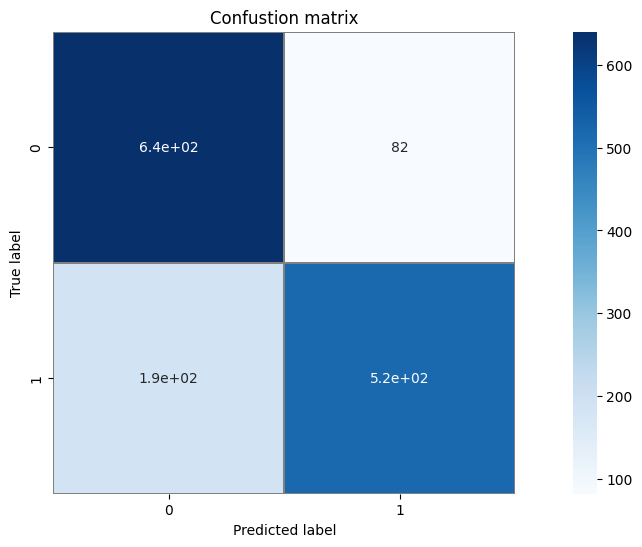

In [18]:
cm = tf.math.confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [19]:
# df_test = pd.read_csv('/kaggle/input/gammafest-water-feasability/test.csv')
# df_test

In [20]:
# df_imp_test = df_test.iloc[:, [0,2,11,16,22,36,37]]

In [21]:
# X_test_real = np.array(df_imp_test)
# X_test_real = scaler.fit_transform(X_test_real)

In [22]:
# pred_real = model.predict(X_test_real)

# y_pred_real=[]
# for i in range(len(pred_real)):
#     y_pred_real.append(0 if pred_real[i] < 0.5 else 1)

In [23]:
# cr = classification_report(y_test, y_pred_real)
# print(cr)

In [24]:
# p_test = model.predict(X_test_real).argmax(axis=1)
# cm = tf.math.confusion_matrix(p_test, y_pred)

# f, ax = plt.subplots(figsize=(15, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
# plt.title('Confustion matrix')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')